# Imports

In [1]:
import tweepy 
import json
import pandas as pd
from tqdm.notebook import trange, tqdm
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Use your credentials to connect to the API

In [73]:
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

consumer_key = creds['CONSUMER_KEY']
consumer_secret = creds['CONSUMER_SECRET']

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

## Make a request for a tweet contaning 'Greece', then print the user's name, id and the text, likes and retweets of the tweet

In [74]:
results = api.search_tweets(q="Greece", count=200, tweet_mode='extended')
#convert tweets to json from tweepy object
tweets = [result._json for result in results]
tweets[-1]

{'created_at': 'Wed Sep 28 17:41:48 +0000 2022',
 'id': 1575178976938573832,
 'id_str': '1575178976938573832',
 'full_text': '@DolioJ @GWheels55 @oulosP Isn’t Greece by their laws pedo simps',
 'truncated': False,
 'display_text_range': [27, 64],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'DolioJ',
    'name': 'Tactical Wisdom',
    'id': 3889486125,
    'id_str': '3889486125',
    'indices': [0, 7]},
   {'screen_name': 'GWheels55',
    'name': 'Garrett Wheeler',
    'id': 1684549417,
    'id_str': '1684549417',
    'indices': [8, 18]},
   {'screen_name': 'oulosP',
    'name': 'Paul Antonopoulos 🇬🇷🇨🇾',
    'id': 3040732982,
    'id_str': '3040732982',
    'indices': [19, 26]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1575155624316473344,
 'in_reply_to_status_id_str': '1575155624316473

In [75]:
len(tweets)

100

In [76]:
max_id = tweets[-1]['id'] -1
max_id

1575178976938573831

In [77]:
results = api.search_tweets(q="Greece", count=200, tweet_mode='extended', max_id = max_id)
#convert tweets to json from tweepy object
tweets = [result._json for result in results]
# tweets[-1]

In [78]:
len(tweets)

100

In [79]:
max_id = tweets[-1]['id'] -1
max_id

1575177704978415615

In [83]:
tweets = []

results = api.search_tweets(q="Greece", count=200, tweet_mode='extended')
#convert tweets to json from tweepy object
tweets_temp = [result._json for result in results]
tweets.extend(tweets_temp)
oldest = tweets_temp[-1]['id']-1
print(f"{len(tweets_temp)} tweets fetched")
print(40*"#")

while len(tweets_temp) > 0:
    results = api.search_tweets(q="Greece", count=200, tweet_mode='extended', max_id = oldest)
    #convert tweets to json from tweepy object
    tweets_temp = [result._json for result in results]
    tweets.extend(tweets_temp)
    oldest = tweets_temp[-1]['id']-1
    print(f"{len(tweets_temp)} tweets fetched")
    print(40*"#")
    

100 tweets fetched
########################################
100 tweets fetched
########################################
100 tweets fetched
########################################
100 tweets fetched
########################################


KeyboardInterrupt: 

In [84]:
len(tweets)

400

In [11]:
tweets[0]['user']['name']#.keys()

'Hellenic 🇬🇷 Spar✝️an'

In [12]:
for tweet in tweets[:5]:
    print(tweet['user']['name'])
    print(tweet['user']['id'])
    print(tweet['full_text'])
    print(tweet['favorite_count'])
    print(tweet['retweet_count'])
    print(50*'#')

Hellenic 🇬🇷 Spar✝️an
767753891689750528
RT @KostasAntLavdas: In new escalation, #Erdogan now accuses #Greece of carrying out a “covert occupation” of Greek islands. It's not a jok…
0
82
##################################################
David Mills
133907152
@drjennings *Some* basis, maybe, but I don't know if it did, really. The Tories didn't have a majority and relied on the Lib Dems, who conveniently underwent a conversion re the UK turning into Greece. Their deficit reduction plans pre-election were similar to Labour's.
0
0
##################################################
ΕΘΝΟΣ
1851378294
Ευχάριστα νέα για το βρέφος που κακοποιήθηκε από τον πατέρα του στη Μεσσηνία: Το αποσωλήνωσαν οι γιατροί https://t.co/1vGmO5bsPR https://t.co/5fHIInuSZZ
0
0
##################################################
Stavroula
2975023547
RT @earthcurated: Santorini, Greece ✨ https://t.co/ngliUMh5IS
0
272
##################################################
Omar Elmenofy
306981267
I'm at Grandma's House in 

# Get the  tweets from Cristiano Ronaldo

In [27]:
name = 'Cristiano'

tweets = api.user_timeline(screen_name=name, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id -1

while True:
    tweets = api.user_timeline(screen_name=name, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break

    oldest_id = tweets[-1].id -1
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 399
N of tweets downloaded till now 599
N of tweets downloaded till now 799
N of tweets downloaded till now 999
N of tweets downloaded till now 1199
N of tweets downloaded till now 1399
N of tweets downloaded till now 1594
N of tweets downloaded till now 1770
N of tweets downloaded till now 1961
N of tweets downloaded till now 2139
N of tweets downloaded till now 2335
N of tweets downloaded till now 2481
N of tweets downloaded till now 2611
N of tweets downloaded till now 2778
N of tweets downloaded till now 2950
N of tweets downloaded till now 3004


In [28]:
all_tweets[0]

Status(_api=<tweepy.api.API object at 0x7fd7721c9070>, _json={'created_at': 'Sat Sep 24 21:38:35 +0000 2022', 'id': 1573789016247468034, 'id_str': '1573789016247468034', 'full_text': 'Grande jogo, importante vitória equipa!Continuamos focados no nosso objetivo 🙏🏽💪🏽\nObrigado ao público português pelo apoio fantástico.👏🏽🇵🇹❤️ https://t.co/JRuyUTxOee', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1573789007787528193, 'id_str': '1573789007787528193', 'indices': [141, 164], 'media_url': 'http://pbs.twimg.com/media/Fdc4w6iXEAEGRQU.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fdc4w6iXEAEGRQU.jpg', 'url': 'https://t.co/JRuyUTxOee', 'display_url': 'pic.twitter.com/JRuyUTxOee', 'expanded_url': 'https://twitter.com/Cristiano/status/1573789016247468034/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 799, 'resize': 'fit'}, 'sm

## From the tweets extract: 
* id
* text
* Likes
* Retweets
* Followers
* Following
* Friends(Mutual follows)

Create a dataframe to save them

In [30]:
id_ = []
text = []
favorite_count = []
retweet_count = []
followers_count = []
following = []
friends_count = []
user = []
entities = []
created_at = []

for tweet in all_tweets:
    tweet = tweet._json
    id_.append(tweet['id'])
    user.append(tweet['user']['name'])
    try:
        text.append(tweet['full_text'])
    except:
        text.append(tweet['text'])
    favorite_count.append(tweet['favorite_count'])
    retweet_count.append(tweet['retweet_count'])
    followers_count.append(tweet['user']['followers_count'])
    following.append(tweet['user']['following'])
    friends_count.append(tweet['user']['friends_count'])
    entities.append(tweet['entities']['hashtags'])
    created_at.append(tweet['created_at'])


In [31]:
len(id_)

3004

In [32]:
d = {
    'id': id_,
    'created_at': created_at,
    'user': user,
    'text': text,
    'favorite_count': favorite_count,
    'retweet_count': retweet_count,
    'followers_count': followers_count,
    'following_count': following,
    'friends_count': friends_count,
    'hashtags': entities
}
data = pd.DataFrame(data=d)
data

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
0,1573789016247468034,Sat Sep 24 21:38:35 +0000 2022,Cristiano Ronaldo,"Grande jogo, importante vitória equipa!Continu...",174581,10442,103716618,None,62,[]
1,1573220875222097923,Fri Sep 23 08:01:00 +0000 2022,Cristiano Ronaldo,"From my first match to now, there’s no feeling...",64216,4291,103716618,None,62,[]
2,1572618993495838721,Wed Sep 21 16:09:20 +0000 2022,Cristiano Ronaldo,Feliz por estar de volta a casa! 😀🇵🇹🙏🏽 https:/...,285068,14204,103716618,None,62,[]
3,1570498600828039169,Thu Sep 15 19:43:39 +0000 2022,Cristiano Ronaldo,Happy to score and help the team win! 3 import...,323466,19031,103716618,None,62,[]
4,1566808585920778248,Mon Sep 05 15:20:51 +0000 2022,Cristiano Ronaldo,It's always good to be with you! 👏🏽 #alwaystog...,364473,18232,103716618,None,62,"[{'text': 'alwaystogether', 'indices': [36, 51]}]"
...,...,...,...,...,...,...,...,...,...,...
2999,78900858888261632,Thu Jun 09 19:06:45 +0000 2011,Cristiano Ronaldo,I played tennis today with friends. It's fun t...,293,586,103716621,None,62,[]
3000,78747751504023552,Thu Jun 09 08:58:21 +0000 2011,Cristiano Ronaldo,Here are some photos from the last game of the...,179,343,103716621,None,62,[]
3001,78023407605792768,Tue Jun 07 09:00:04 +0000 2011,Cristiano Ronaldo,Check out this cool @NikeFootball video- it's ...,235,455,103716621,None,62,[]
3002,77171147648675840,Sun Jun 05 00:33:30 +0000 2011,Cristiano Ronaldo,Portugal 1 - Norway 0. Difficult game but we g...,335,685,103716621,None,62,[]


## Assure that you didn't download the same tweet multipe times

In [33]:
data['id'].value_counts()

1573789016247468034    1
447477389677719552     1
450642783741947904     1
450642510634037248     1
450634163499302912     1
                      ..
850254884741840898     1
850064812595916801     1
849879622338707456     1
849178329089495040     1
76305413930369024      1
Name: id, Length: 3004, dtype: int64

# Plot the Likes of each tweet into a bargraph and the retweets into another bargraph

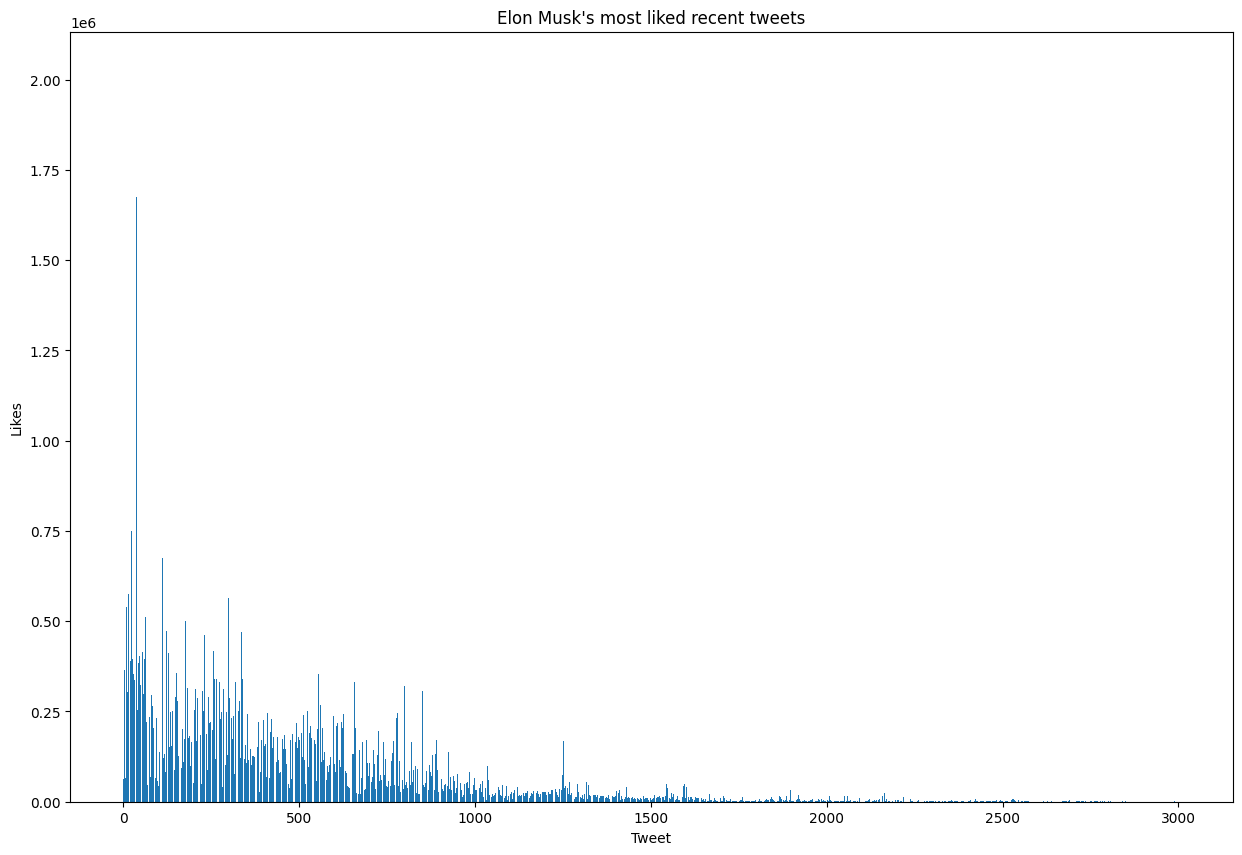

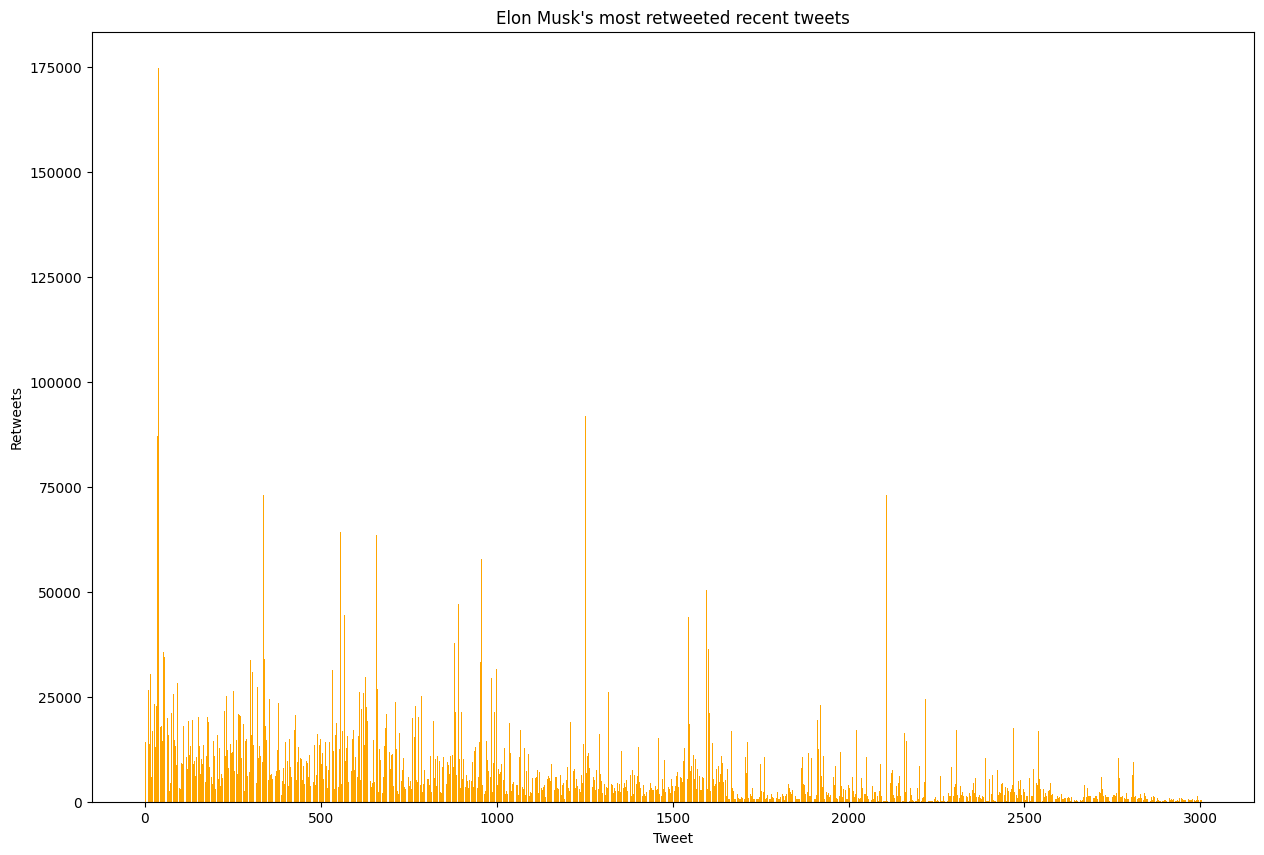

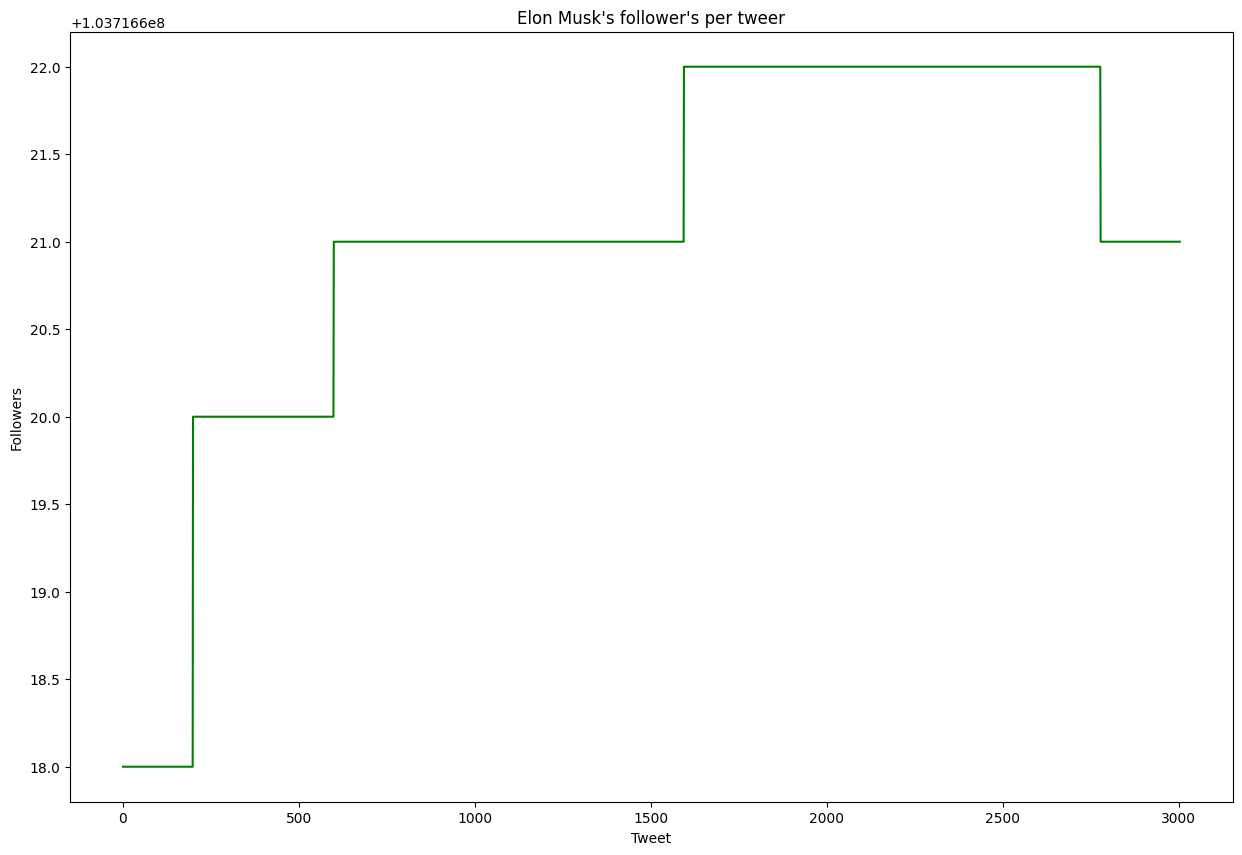

In [34]:
t = np.arange(data.shape[0])
plt.figure(figsize=[15,10])
plt.bar(t,data['favorite_count'])
plt.xlabel('Tweet')
plt.ylabel('Likes')
plt.title('Elon Musk\'s most liked recent tweets')

plt.figure(figsize=[15,10])
plt.bar(t,data['retweet_count'], color='orange')
plt.xlabel('Tweet')
plt.ylabel('Retweets')
plt.title('Elon Musk\'s most retweeted recent tweets')

plt.figure(figsize=[15,10])
plt.plot(t,data['followers_count'], color='green')
plt.xlabel('Tweet')
plt.ylabel('Followers')
plt.title('Elon Musk\'s follower\'s per tweer')
None

The follower counter it is logical to be constant because it is updated daily(every 24 hours to be exact) not in real time.

## Find the most liked tweet

In [35]:
most_fav = data.sort_values('favorite_count', ascending=False)
most_fav.head()

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
36,1520339985559347202,Sat Apr 30 09:51:13 +0000 2022,Cristiano Ronaldo,Forever Love…❤️🙏🏽 https://t.co/x18W34rYRM,2031270,87160,103716618,None,62,[]
39,1516120150533095432,Mon Apr 18 18:23:06 +0000 2022,Cristiano Ronaldo,https://t.co/vRNVCoegOW,1924878,174609,103716618,None,62,[]
38,1517900888312061952,Sat Apr 23 16:19:07 +0000 2022,Cristiano Ronaldo,❤️ https://t.co/HLg0RbI8SM,1675477,107802,103716618,None,62,[]
11,1553808180332969985,Sun Jul 31 18:21:53 +0000 2022,Cristiano Ronaldo,Happy to be back 💪🏽🙏🏽 https://t.co/Fp6dpBTXcb,792205,38006,103716618,None,62,[]
40,1515698113582927874,Sun Apr 17 14:26:05 +0000 2022,Cristiano Ronaldo,30 hat-tricks before 30 and 30 hat-tricks afte...,764396,69372,103716618,None,62,[]


## Find the most retweeted tweets

In [36]:
max_ret = data.sort_values('retweet_count', ascending=False)
max_ret.head()

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
39,1516120150533095432,Mon Apr 18 18:23:06 +0000 2022,Cristiano Ronaldo,https://t.co/vRNVCoegOW,1924878,174609,103716618,None,62,[]
932,880473340619759616,Thu Jun 29 17:09:37 +0000 2017,Cristiano Ronaldo,So happy to be able to hold the two new loves ...,509100,138077,103716621,None,62,[]
623,1018927028572172288,Mon Jul 16 18:35:09 +0000 2018,Cristiano Ronaldo,Forza Juve! #FinoAllaFine https://t.co/bBZ5VWdEWX,511854,120995,103716621,None,62,"[{'text': 'FinoAllaFine', 'indices': [12, 25]}]"
38,1517900888312061952,Sat Apr 23 16:19:07 +0000 2022,Cristiano Ronaldo,❤️ https://t.co/HLg0RbI8SM,1675477,107802,103716618,None,62,[]
851,912028229011169281,Sun Sep 24 18:57:29 +0000 2017,Cristiano Ronaldo,"En este momento de dolor, envío a la familia d...",307623,107126,103716621,None,62,[]


# Get the most recent tweets from Elon Musk

In [ ]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    #initialize a list to hold all the tweepy Tweets
    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name=screen_name, count=200, tweet_mode='extended')

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets form {oldest}")

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name=screen_name, count=200, max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print(f"...{len(alltweets)} tweets downloaded so far")
    tweets = [tweet._json for tweet in alltweets]
    
    # save the list of tweets
    with open(screen_name+'.pickle', 'wb') as handle:
        pickle.dump(tweets, handle, protocol=pickle.HIGHEST_PROTOCOL)

        return tweets

In [ ]:
tweets = get_all_tweets('elonmusk')

# Which are the top 3 hashtags of Elon Musk?

In [67]:
hashtags= data[data['hashtags'].str.len() > 0]['hashtags']
hashtags

8      [{'text': 'AI', 'indices': [22, 25]}, {'text':...
15        [{'text': 'TEAMMOLLY', 'indices': [270, 280]}]
69              [{'text': 'tesla', 'indices': [12, 18]}]
71     [{'text': 'Tesla', 'indices': [40, 46]}, {'tex...
80     [{'text': 'ELONGOATTOKEN', 'indices': [38, 52]...
94     [{'text': 'ClimateCrisis', 'indices': [87, 101]}]
96     [{'text': 'ElectricVehicles', 'indices': [70, ...
128              [{'text': 'FSD', 'indices': [97, 101]}]
146            [{'text': 'DF22', 'indices': [273, 278]}]
158    [{'text': 'Tesla', 'indices': [144, 150]}, {'t...
Name: hashtags, dtype: object

In [68]:
hashtags = hashtags.explode()
hashtags

8                    {'text': 'AI', 'indices': [22, 25]}
8                  {'text': 'Web3', 'indices': [40, 45]}
8               {'text': 'Creator', 'indices': [46, 54]}
8      {'text': 'cryptocurrencies', 'indices': [88, 1...
8      {'text': 'MachineLearning', 'indices': [106, 1...
8                  {'text': 'AI', 'indices': [123, 126]}
8              {'text': 'Python', 'indices': [127, 134]}
15          {'text': 'TEAMMOLLY', 'indices': [270, 280]}
69                {'text': 'tesla', 'indices': [12, 18]}
71                {'text': 'Tesla', 'indices': [40, 46]}
71      {'text': 'SelfDrivingCars', 'indices': [57, 73]}
71       {'text': 'selfDrivingCar', 'indices': [74, 89]}
80        {'text': 'ELONGOATTOKEN', 'indices': [38, 52]}
80             {'text': 'Dogecoin', 'indices': [57, 66]}
80              {'text': 'Tesla', 'indices': [137, 143]}
80               {'text': 'Doge', 'indices': [154, 159]}
80           {'text': 'DOGEARMY', 'indices': [180, 189]}
80            {'text': 'DogeFam

In [69]:
hashtags = pd.json_normalize(hashtags)
hashtags

,text,indices
0,AI,"[22, 25]"
1,Web3,"[40, 45]"
2,Creator,"[46, 54]"
3,cryptocurrencies,"[88, 105]"
4,MachineLearning,"[106, 122]"
5,AI,"[123, 126]"
6,Python,"[127, 134]"
7,TEAMMOLLY,"[270, 280]"
8,tesla,"[12, 18]"
9,Tesla,"[40, 46]"


In [71]:
hashtags['text'].value_counts().head(3)

Tesla       3
AI          2
Dogecoin    2
Name: text, dtype: int64

# What time of the day is Elon Musk tweeting the most?

In [15]:
data['created_at'] =  pd.to_datetime(data['created_at'])
data['time_hour'] = data['created_at'].dt.hour
data.head()

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags,time_hour
0,1361096223428653056,2021-02-14 23:33:22+00:00,Elon Musk,@RationalEtienne An acceptable percentage. Dog...,850,160,46857343,None,103,[],23
1,1361094185412100096,2021-02-14 23:25:16+00:00,Elon Musk,If major Dogecoin holders sell most of their c...,44115,7647,46857343,None,103,[],23
2,1360774866023112704,2021-02-14 02:16:24+00:00,Elon Musk,@MarcusHouseGame Success on landing probabilit...,14958,731,46857343,None,103,[],2
3,1360700181658886147,2021-02-13 21:19:38+00:00,Elon Musk,было бы большой честью поговорить с вами,57503,3741,46857343,None,103,[],21
4,1360697159767711749,2021-02-13 21:07:38+00:00,Elon Musk,.@KremlinRussia_E would you like join me for a...,170243,11820,46857343,None,103,[],21


In [16]:
max_tweets = data.groupby(['time_hour']).count().sort_values('id', ascending=False)
max_tweets.head()

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
time_hour,,,,,,,,,,
18,205,205,205,205,205,205,205,0,205,205
19,200,200,200,200,200,200,200,0,200,200
23,199,199,199,199,199,199,199,0,199,199
22,196,196,196,196,196,196,196,0,196,196
20,193,193,193,193,193,193,193,0,193,193


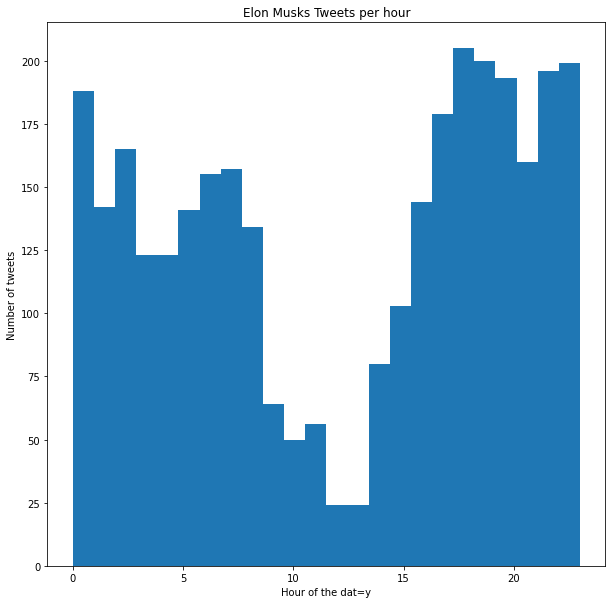

In [17]:
plt.figure(figsize=(10,10))
plt.hist(data['time_hour'],bins=24)
plt.xlabel('Hour of the dat=y')
plt.ylabel('Number of tweets')
plt.title('Elon Musks Tweets per hour')
None

# Get the most recent tweets for ‘tesla’. How many are there from Elon Musk?

In [102]:
def get_all_popular_tweets(query):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    #initialize a list to hold all the tweepy Tweets
    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.search_tweets(q= query, result_type='popular', count=200, tweet_mode = "extended")

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.search_tweets(q= query, result_type='popular', count=200, tweet_mode = "extended", max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print(f"...{len(alltweets)} tweets downloaded so far")
    tweets = [json.loads(json.dumps(tweet._json)) for tweet in alltweets]
    
    # save the list of tweets
    with open(query+'.pickle', 'wb') as handle:
        pickle.dump(tweets, handle, protocol=pickle.HIGHEST_PROTOCOL)

        return tweets

In [103]:
tweets = get_all_popular_tweets('tesla')

getting tweets before 1574412957051592703
...30 tweets downloaded so far
getting tweets before 1572916939298689023
...45 tweets downloaded so far
getting tweets before 1572548732637306879
...58 tweets downloaded so far
getting tweets before 1572233508872912897
...70 tweets downloaded so far
getting tweets before 1572201470367354880
...78 tweets downloaded so far
getting tweets before 1572118430362238975
...78 tweets downloaded so far


In [104]:
id_ = []
text = []
favorite_count = []
retweet_count = []
followers_count = []
following = []
friends_count = []
user = []
entities = []
created_at = []

for tweet in tweets:
    id_.append(tweet['id'])
    user.append(tweet['user']['name'])
    try:
        text.append(tweet['full_text'])
    except:
        text.append(tweet['text'])
    favorite_count.append(tweet['favorite_count'])
    retweet_count.append(tweet['retweet_count'])
    followers_count.append(tweet['user']['followers_count'])
    following.append(tweet['user']['following'])
    friends_count.append(tweet['user']['friends_count'])
    entities.append(tweet['entities']['hashtags'])
    created_at.append(tweet['created_at'])



In [105]:
d = {
    'id': id_,
    'created_at': created_at,
    'user': user,
    'text': text,
    'favorite_count': favorite_count,
    'retweet_count': retweet_count,
    'followers_count': followers_count,
    'following_count': following,
    'friends_count': friends_count,
    'hashtags': entities
}
data = pd.DataFrame(data=d)
data

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
0,1574577873280704525,Tue Sep 27 01:53:13 +0000 2022,maura quint,"yeah come on, NASA, unmanned vehicles crashing...",22519,1761,125024,None,1316,[]
1,1574817415573245952,Tue Sep 27 17:45:05 +0000 2022,The Onion,Every Question For Tesla Job Candidate About R...,2481,212,11979455,None,6,[]
2,1575153807759220736,Wed Sep 28 16:01:47 +0000 2022,Nathanael Derek,Special shout out to Ashley for fighting throu...,133,83,3709,None,1061,[]
3,1574549669736218632,Tue Sep 27 00:01:09 +0000 2022,Dave Lee,Crazy to think about how many people/investors...,1651,117,259767,None,337,[]
4,1574701308250128384,Tue Sep 27 10:03:43 +0000 2022,Gary Black,$TSLA management expects another “very high vo...,987,96,226037,None,98,[]
...,...,...,...,...,...,...,...,...,...,...
73,1572133467609088001,Tue Sep 20 08:00:02 +0000 2022,CNBC,Here's how an unknown Vietnamese carmaker is t...,35,23,4850768,None,857,[]
74,1572162864948936706,Tue Sep 20 09:56:51 +0000 2022,Sky News,The founder of Tesla and SpaceX posted on Twit...,63,21,8087113,None,23,[]
75,1572199893019795456,Tue Sep 20 12:23:59 +0000 2022,DW Español,Elon Musk busca que las fábricas de #Tesla en ...,54,16,1276207,None,161,"[{'text': 'Tesla', 'indices': [36, 42]}]"
76,1572136325964529665,Tue Sep 20 08:11:23 +0000 2022,𝙳𝚊𝚟𝚒𝚍 𝚂𝚌𝚑𝚠𝚊𝚛𝚝𝚣,"The interviewer responds, how about $75K but a...",814,25,387171,None,926,[]


In [106]:
data[data['user']== 'Elon Musk']

,id,created_at,user,text,favorite_count,retweet_count,followers_count,following_count,friends_count,hashtags
21,1572620091396878338,Wed Sep 21 16:13:42 +0000 2022,Elon Musk,@teslaownersSV @Teslarati Maybe little electri...,4931,347,107254708,None,122,[]
32,1572620091396878338,Wed Sep 21 16:13:42 +0000 2022,Elon Musk,@teslaownersSV @Teslarati Maybe little electri...,4931,347,107254713,None,122,[]
